# **Overview**
New York City Taxi and Limousine Commission (TLC) is the agency responsible
for licensing and regulating New York City's medallion (yellow) taxis, street hail livery (green) taxis,
for-hire vehicles (FHVs), commuter vans, and paratransit vehicles.

The Taxi and Limousine Commission (TLC) regulates how much a cab can charge per mile or per minute, determines a cab company's leasing fees for drivers, monitors routes taken by the drivers (to ensure they are not artificially inflating the price), and much more. In essence, a cab company (or a cab driver) can only make as much money as the government allows them to make.

The TLC collects trip record
information for each taxi and for-hire vehicle trip completed by our licensed drivers and vehicles.
We receive taxi trip data from the technology service providers (TSPs) that provide electronic
metering in each cab,

*Source: https://www.investopedia.com/articles/professionals/092515/how-nycs-yellow-cab-works-and-makes-money.asp*

**Stakeholder Statement**

Taxi companies may be interested in understanding demand patterns, identifying popular pickup/drop-off locations, and pricing strategies to maximize revenue. They may also want to improve service quality and efficiency based on customer behavior analysis.

**Goals Setting & Problem Statement**

This project analysis aims to provide insights on the operations of NYC taxi, 
    
    1. How to optimize taxi fares ?  
   
    2. How to optimize the distribution of drivers?
   
    3. How to to better serve customers?  



## **Dataset: NYC TLC Taxi Trip Data**

The taxi dataset used in this project is yellow taxi trip data, which records attributes such as pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. Yellow taxis are taxis that allowed to respond to street hailed from a passenger in all five boroughs.



### NYC TLC Taxi Trip Data

| Columns       | Description |  Notes| 
| :---          |    :----   | :---- | 
| 'VendorID'    | LPEP provider that provided the record.| [NOT ESSENTIAL > TO BE DROPPED] |
| 'lpep_pickup_datetime',   | Starting time from taxi meter
| 'lpep_dropoff_datetime',  | Ending time from taxi meter
| 'store_and_fwd_flag',     | Trip record are saved and send after signal received Y= store n forwad N=Not store n forward  
| 'RatecodeID',             | The final rate code in effect at the end of the trip.|     1=Standard rate, 2=JFK (Airport rate), 3=Newark   (Newark Country), 4=Nassau or Westchester (County), 5=Negotiated fare , 6=Group ride|
|   *There are different rates for different type of trips & airport destination.*
| 'PULocationID',           | Pickup location, using Taxi Zone code
| 'DOLocationID',           | Dropoff location, using Taxi Zone code
| 'passenger_count',        | # of passengers, driver manually input, max 6 by law
| 'trip_distance',          | Distance per trip, in miles
| 'fare_amount',            | The time and distance fare is calculated by the meter. includes the $0.50 and $1 rush hour and overnight charges
| 'extra',                  | only includes the $0.50 and $1 rush hour and overnight charges.
| 'mta_tax',                | $0.50 MTA tax that is automatically triggered based on the metered rate in use.
| 'tip_amount',             | tips from customers, tips from customers with CC payment
| 'tolls_amount',           | tolls fare amount
| 'ehail_fee',              | - | unidentified, all nulls  **[TO BE DROPPED]** |
| 'improvement_surcharge',  | $0.30 improvement surcharge assessed on hailed trips at the flag drop.
| 'total_amount',           | The total amount charged to passengers. Does not include cash tips.
| 'payment_type',           | 1 = Credit card 2 = Cash 3 = No charge 4 = Dispute 5 = Unknown 6 = Voided trip
| 'trip_type',              | 1 = Street|hail (inside the city) 2 = Dispatch (outside city)
| 'congestion_surcharge'    | surcharge for traffic congestion

---


**ADDITIONAL Dataset: Taxi Zone Dataset**

The pick-up and drop-off locations are populated by numbers ranging from 1 to 263. These numbers corresponds to taxi zone.

• Taxi Zone Shapefile: contains geometric information of each taxi zones.

• Taxi Zone Look Up Table: a table that contains a list of TLC taxi zone location IDs, location names, and corresponding boroughs of each zone.

Obtained from: https://www.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf


# 1. Data Preparation: Reading & Load Data

In [315]:
#Import relevant library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [371]:
#Set display columns to accomodate all columns
pd.options.display.max_columns = 100

In [316]:
#Loading Data

df = pd.read_csv('/Users/Dwika/My Projects/Modul 2 Purwadhika/_CAPSTONE Project Modul 2/Raw Dataset/NYC TLC Trip Record.csv')

/var/folders/hp/56vw0j_10t7b71dy17hxntmh0000gp/T/ipykernel_83433/729993034.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/Dwika/My Projects/Modul 2 Purwadhika/_CAPSTONE Project Modul 2/Raw Dataset/NYC TLC Trip Record.csv')


In [317]:
#Data preview
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [318]:
#General info on data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [319]:
#Construct deep Info on columns & values:

NYCtaxi = []
for i in df.columns:
    NYCtaxi.append([i, df[i].dtypes,
                      df[i].isna().sum(),
                      round((((df[i].isna().sum())/(len(df)))*100),2), 
                    df[i].nunique(), 
                    df[i].sample(3).values])
pd.DataFrame(NYCtaxi, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique','uniqueSample'])


,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,VendorID,int64,0,0.00,2,"[2, 2, 2]"
1,lpep_pickup_datetime,object,0,0.00,66575,"[2023-01-25 10:48:14, 2023-01-25 15:46:41, 202..."
2,lpep_dropoff_datetime,object,0,0.00,66519,"[2023-01-20 18:19:40, 2023-01-05 17:11:36, 202..."
3,store_and_fwd_flag,object,4324,6.34,2,"[N, N, N]"
4,RatecodeID,float64,4324,6.34,6,"[1.0, 1.0, 1.0]"
5,PULocationID,int64,0,0.00,226,"[7, 97, 116]"
6,DOLocationID,int64,0,0.00,249,"[223, 121, 238]"
7,passenger_count,float64,4324,6.34,10,"[1.0, 1.0, nan]"
8,trip_distance,float64,0,0.00,1870,"[3.86, 2.8, 4.44]"
9,fare_amount,float64,0,0.00,2553,"[31.7, 21.9, 12.8]"


> Insert findings / resume dari part 1 untuk bridging ke part 2 (Data Cleaning)

---

# 2. Data Cleaning

**Overview**:
- 2.1 Drop Duplicate rows 
- 2.5 Dropping Unnecessary Columns
- 2.6 Converting columns containing time infro from Object > Datetime
    - lpep_pickup_datetime
    - lpep_dropoff_datetime
- 2.2 Cleaning Null Values
    - Substitute null values if appropriate data are available 
    - Drop null values if appropriate data not available 
    - Null values in **store_and_fwd_flag** column --> replace with Y
    - Null values in **RatecodeID** column --> replace according to MTAtax 
    - Null values in **passenger_count** column --> replace according to mean/median of passenger 
    - Null values in **payment_type** column --> Replace with CC if tips are recorded
    - Null values in **trip_type** column --> replace types based on trip distance / fare / PU & DU location
    - Null values in **congestion_surcharge** --> replace with data based on location / mean/median of available values
- 2.3 Finding & Fixing Data Anomalies
    - Negative values on numerical columns 
- 2.4 Check distribution in numerical columns, observe & fix outliers

## 2.1 Dropping Duplicate Rows

In [320]:
#Check for duplicates --> CLEAR

df[df.duplicated()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


No duplicate rows

## 2.3 Cleaning Null Values

### 2.3.1 Checking Null values 

In [321]:
#Checking the amount of missing values
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

### Note on 'store_and_fwd_flag' Column

In [322]:
df[df['store_and_fwd_flag'].isna()].shape

(4324, 20)

**4324** Total missing values from the column 'store_and_fwd_flag'. 

Assuming the missing values are from the bug within 'store_and_fwd_flag' feature, which supposed to notify the system when no signal are available to update the data, **all missing values will are assumed to be device problem** (data are stored when no signal available, then forward later)

In [323]:
#Missing values based on VendorID

df[df['store_and_fwd_flag'].isna()]['VendorID'].value_counts(normalize=True)

VendorID
2    0.970398
1    0.029602
Name: proportion, dtype: float64

**97%** of the missing values are obtained from **TSP vendor 2**, which indicates that the metering devices are **less reliable**.

### 2.3.2 Dropping Rows with Null Values

In [324]:
#Percentage of missing values
round(df.isna().sum()/len(df)*100,2)

VendorID                   0.00
lpep_pickup_datetime       0.00
lpep_dropoff_datetime      0.00
store_and_fwd_flag         6.34
RatecodeID                 6.34
PULocationID               0.00
DOLocationID               0.00
passenger_count            6.34
trip_distance              0.00
fare_amount                0.00
extra                      0.00
mta_tax                    0.00
tip_amount                 0.00
tolls_amount               0.00
ehail_fee                100.00
improvement_surcharge      0.00
total_amount               0.00
payment_type               6.34
trip_type                  6.35
congestion_surcharge       6.34
dtype: float64

The missing values are contained on **4324** rows where columns are ['RatecodeID', 'passenger_count' , 'payment_type', 'trip_type', 'congestion_surcharge'].

Assuming the **6.34%** data won't have significant impact if dropped, it's decided to proceed with **dropping selected rows containing null values**.

In [325]:
#Dropping rows containing null values 
df.dropna(subset=['store_and_fwd_flag','RatecodeID', 'passenger_count' , 'payment_type', 'trip_type', 'congestion_surcharge'], inplace=True)

In [326]:
#Check remaining null values
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag           0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
passenger_count              0
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                63877
improvement_surcharge        0
total_amount                 0
payment_type                 0
trip_type                    0
congestion_surcharge         0
dtype: int64

### 2.3.3 Dropping Null Column

As ['ehail_fee'] columns are 100% null we will **drop the column** as it is unnecessary for our analysis.

In [327]:
# Drop 'ehail_fee' column

df.drop(columns='ehail_fee', inplace=True)

In [328]:
#Verify All null values deleted
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

>Recap of null value cleaning:
>- xx rows down to xx 
>- Dropped **4324** rows containing missing values on necessary columns
>- Dropped entire column of 'ehail_fee' containing 100% missing values

From the data info, we could see that there are several columns data type that needs to be adjusted:
- Converting columns containing time infro from Object > Datetime
    - lpep_pickup_datetime
    - lpep_dropoff_datetime
- Converting columns that should contain integer values
    - passenger_count (float64 --> int64)

## 2.2 Cleaning Column Data Types

### 2.2.1 Converting Datetime Columns

In [329]:
# Converting Columns df['lpep_pickup_datetime', 'lpep_dropoff_datetime'] from Object -> Datetime and catch errors if any

#Initiate blank list
error_rows = []

#return values with error and assign them to list error_rows
def convert_datetime_catch_error(date_str):
    try:
        return pd.to_datetime(date_str)
    except:
        error_rows.append(date_str)
        return date_str
    
#assign original columns with converted datetime type    
df[['lpep_pickup_datetime','lpep_dropoff_datetime']] = df[['lpep_pickup_datetime','lpep_dropoff_datetime']].apply(convert_datetime_catch_error)

In [330]:
#Check if there are any error rows
error_rows

[]

### 2.2.2 Converting 'passenger_count' column from Float --> Integer

As 'passenger_count' supposed to contain the number of passenger in a taxi, it should only contain **integer values instead of float**.

In [331]:
#Casting df['passenger_count'] as int
df['passenger_count'] = df['passenger_count'].astype('int64')

In [332]:
#Verify datatype
df['passenger_count'].dtype

dtype('int64')

In [333]:
#Confirming all columns are converted appropriately
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63877 entries, 0 to 63886
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               63877 non-null  int64         
 1   lpep_pickup_datetime   63877 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  63877 non-null  datetime64[ns]
 3   store_and_fwd_flag     63877 non-null  object        
 4   RatecodeID             63877 non-null  float64       
 5   PULocationID           63877 non-null  int64         
 6   DOLocationID           63877 non-null  int64         
 7   passenger_count        63877 non-null  int64         
 8   trip_distance          63877 non-null  float64       
 9   fare_amount            63877 non-null  float64       
 10  extra                  63877 non-null  float64       
 11  mta_tax                63877 non-null  float64       
 12  tip_amount             63877 non-null  float64       
 13  tolls_

---

In [334]:
#Verify datatype
df[['lpep_pickup_datetime','lpep_dropoff_datetime']].dtypes

lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
dtype: object

Successfully converted the columns to datetime

## 2.4 Cleaning up Data Anomalies

### 2.3.1 Check for data abnormalities

In [335]:
#Checking for anomalies from descriptive stats
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,63877.000000,63877,63877,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000
mean,1.855895,2023-01-16 20:29:28.932651776,2023-01-16 20:47:27.346791168,1.101836,97.730200,138.308797,1.315920,2.576974,16.074491,0.880473,0.626951,2.041507,0.144182,0.949187,21.200955,1.373671,1.021933,0.726862
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,2023-01-09 12:15:18,2023-01-09 12:33:17,1.000000,74.000000,74.000000,1.000000,1.100000,9.000000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:44:46,2023-01-17 08:59:19,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.400000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:18:41,2023-01-24 16:36:36,1.000000,117.000000,220.000000,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.500000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000
std,0.351199,NaN,NaN,0.620487,60.173501,76.883640,0.979123,6.760261,13.277144,1.292861,0.366919,2.998734,1.012740,0.201782,15.131310,0.508058,0.146465,1.212897


>From the stats it is found that some data have abnormal values:
>- **Fare** datas have **negative values** where it's supposed to be positive only values
>- Possible **outliers** on **trip distance** and **fares** data

### 2.3.2 Checking rows with Fare data having negative values

In [336]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,63877.000000,63877,63877,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000
mean,1.855895,2023-01-16 20:29:28.932651776,2023-01-16 20:47:27.346791168,1.101836,97.730200,138.308797,1.315920,2.576974,16.074491,0.880473,0.626951,2.041507,0.144182,0.949187,21.200955,1.373671,1.021933,0.726862
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,2023-01-09 12:15:18,2023-01-09 12:33:17,1.000000,74.000000,74.000000,1.000000,1.100000,9.000000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:44:46,2023-01-17 08:59:19,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.400000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:18:41,2023-01-24 16:36:36,1.000000,117.000000,220.000000,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.500000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000
std,0.351199,NaN,NaN,0.620487,60.173501,76.883640,0.979123,6.760261,13.277144,1.292861,0.366919,2.998734,1.012740,0.201782,15.131310,0.508058,0.146465,1.212897


**Fare** datas have **negative values** where it's supposed to be positive only values

In [337]:
#Check where fare contains negative values, store to a variable
negativeVal = df[df['total_amount'] < 0 ]
negativeVal

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1,0.00,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,4.0,1.0,0.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3.0,1.0,0.0
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1,0.77,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,4.0,1.0,0.0
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2,0.08,-3.7,0.0,-0.5,0.0,0.0,-1.0,-5.2,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1.0,130,130,3,0.05,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,4.0,1.0,0.0
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1.0,75,75,2,0.08,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3.0,1.0,0.0
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1,0.00,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,3.0,1.0,0.0
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1,0.15,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-6.2,3.0,1.0,0.0


In [338]:
#Checking duplicates based on [lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID'] columns
df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID'] ,keep=False)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2,0.17,3.0,0.0,0.5,0.0,0.0,1.0,4.5,3.0,1.0,0.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1,0.00,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,4.0,1.0,0.0
899,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1,0.00,3.0,0.0,0.5,0.0,0.0,1.0,4.5,4.0,1.0,0.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1,0.00,2.5,0.5,0.5,0.0,0.0,0.3,3.8,3.0,1.0,0.0
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1,0.15,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-6.2,3.0,1.0,0.0
63808,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1,0.15,3.7,1.0,0.5,0.0,0.0,1.0,6.2,3.0,1.0,0.0
63868,2,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5.0,264,264,1,0.00,-10.0,0.0,0.0,0.0,0.0,-1.0,-11.0,4.0,2.0,0.0


The negative values turns out are the **duplicate** data base on [lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID'] columns, but negative values on the fare datas.

In [339]:
# Dropping the rows based on index containing negative fare values 
df.drop(negativeVal.index, inplace=True)

In [340]:
#Verify on negative fares
df[df['total_amount'] < 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


>Cleared **174 rows** containing negative value of total_amount

### 2.3.3 Checking 'passenger_count' having <1 or >7 values 

Verify the number of passenger based on common logic
- Passenger should be >= 1 for a taxi to be taking trip
- Passenger should be <= 7 as stated by the TLC regulation (source: https://www.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page)

In [341]:
#Check the data based on passenger_count < 1
df[df['passenger_count'] < 1]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
99,2,2023-01-01 01:27:36,2023-01-01 01:27:43,N,5.0,168,168,0,0.0,20.0,0.00,0.0,0.0,0.0,1.0,21.00,1.0,2.0,0.00
254,1,2023-01-01 04:21:35,2023-01-01 04:30:00,N,1.0,129,129,0,1.3,8.0,0.50,1.5,2.8,4.0,1.0,16.80,1.0,1.0,0.00
446,1,2023-01-01 11:42:13,2023-01-01 11:49:21,N,1.0,260,260,0,1.2,8.6,0.00,1.5,2.0,0.0,1.0,12.10,1.0,1.0,0.00
486,1,2023-01-01 12:11:05,2023-01-01 12:20:45,N,1.0,42,127,0,3.4,16.3,0.00,1.5,1.0,0.0,1.0,18.80,1.0,1.0,0.00
487,1,2023-01-01 12:56:11,2023-01-01 13:01:06,N,1.0,75,236,0,1.2,7.2,2.75,1.5,3.4,0.0,1.0,14.85,1.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63239,1,2023-01-31 18:27:02,2023-01-31 18:27:08,N,1.0,145,145,0,0.0,3.0,2.50,1.5,0.0,0.0,1.0,7.00,2.0,1.0,0.00
63247,1,2023-01-31 18:01:21,2023-01-31 18:09:22,N,1.0,236,236,0,1.0,9.3,5.25,1.5,3.2,0.0,1.0,19.25,1.0,1.0,2.75
63288,1,2023-01-31 18:07:39,2023-01-31 18:07:55,N,1.0,260,260,0,0.1,3.0,2.50,1.5,0.0,0.0,1.0,7.00,2.0,1.0,0.00
63420,1,2023-01-31 18:32:09,2023-01-31 18:32:33,N,1.0,145,145,0,0.0,3.0,2.50,1.5,0.0,0.0,1.0,7.00,3.0,1.0,0.00


In [342]:
#Check the data based on passenger_count > 7
df[df['passenger_count'] > 7]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
11478,2,2023-01-06 21:10:08,2023-01-06 21:10:11,N,5.0,265,265,9,0.00,90.00,0.0,0.0,6.0,0.0,0.3,96.30,1.0,2.0,0.0
26612,2,2023-01-14 03:09:48,2023-01-14 03:09:50,N,5.0,95,95,8,0.12,8.90,0.0,0.0,5.0,0.0,1.0,14.90,1.0,2.0,0.0
29824,2,2023-01-15 19:21:14,2023-01-15 19:21:17,N,5.0,75,75,8,0.00,8.00,0.0,0.0,1.0,0.0,1.0,10.00,1.0,2.0,0.0
44307,2,2023-01-22 23:40:13,2023-01-22 23:40:21,N,5.0,83,83,9,0.00,9.99,0.0,0.0,2.2,0.0,1.0,13.19,1.0,2.0,0.0


- 336 data contains <1 passenger
- 4 data contains >7 passenger

### 2.3.4 Checking on year datetime 

In [343]:
#Check data from years datetime
df['lpep_pickup_datetime'].dt.year.value_counts()

lpep_pickup_datetime
2023    63700
2022        2
2009        1
Name: count, dtype: int64

Only 3 datas outside year 2023, as it's insignificant and assumed won't provide any insight, those rows will be dropped

In [344]:
#Dropping rows with year date outside 2023 

display(df[df['lpep_pickup_datetime'].dt.year < 2023])



,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
298,2,2022-12-09 14:10:49,2022-12-09 14:22:26,N,1.0,7,56,1,5.37,16.0,0.0,0.5,0.0,0.00,0.3,16.8,2.0,1.0,0.00
318,2,2022-12-09 14:55:42,2022-12-09 15:33:06,N,1.0,260,164,1,5.48,25.5,0.0,0.5,0.0,6.55,0.3,35.6,2.0,1.0,2.75
17874,2,2009-01-01 20:21:27,2009-01-02 11:07:31,N,1.0,65,178,1,7.72,34.5,0.0,0.5,7.2,0.00,1.0,43.2,1.0,1.0,0.00


In [345]:
#find index where data outside 2023 located
yearNotIncluded = df[df['lpep_pickup_datetime'].dt.year < 2023].index

In [346]:
# df.drop(index=yearNotIncluded, inplace=True)

> **Recap on Data Anomaly Findings**
> - Cleared **174 rows** containing negative value of trip fares
> - **336** data contains <1 passenger
> - **4** data contains >7 passenger
> - **3** data are outside year 2023


## 2.4 Analyze Outliers

### 2.4.1 Initial analysis from descriptive stats

In [347]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,63703.000000,63703,63703,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000
mean,1.855501,2023-01-16 20:35:50.248277248,2023-01-16 20:53:51.221229312,1.101518,97.692008,138.374723,1.315590,2.583096,16.135061,0.885225,0.629959,2.047321,0.144576,0.954423,21.282180,1.368774,1.021867,0.728977
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2023-01-09 12:29:11.500000,2023-01-09 12:43:05,1.000000,74.000000,74.000000,1.000000,1.100000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:47:46,2023-01-17 09:03:53,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.460000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:18:24,2023-01-24 16:36:21.500000,1.000000,116.000000,222.000000,1.000000,3.060000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.500000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000
std,0.351597,NaN,NaN,0.619562,60.144885,76.883641,0.979343,6.767790,13.233962,1.290223,0.362826,3.000464,1.014094,0.175223,15.062816,0.499549,0.146251,1.213732


From the initial descriptive stats, it's likely there are outlier that are heavily skewing the data on trip_distance 

In [348]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [349]:
numerical_cols = ['passenger_count', 'trip_distance', 'fare_amount', 'extra',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']

In [350]:
numerical_cols

['passenger_count',
 'trip_distance',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount']

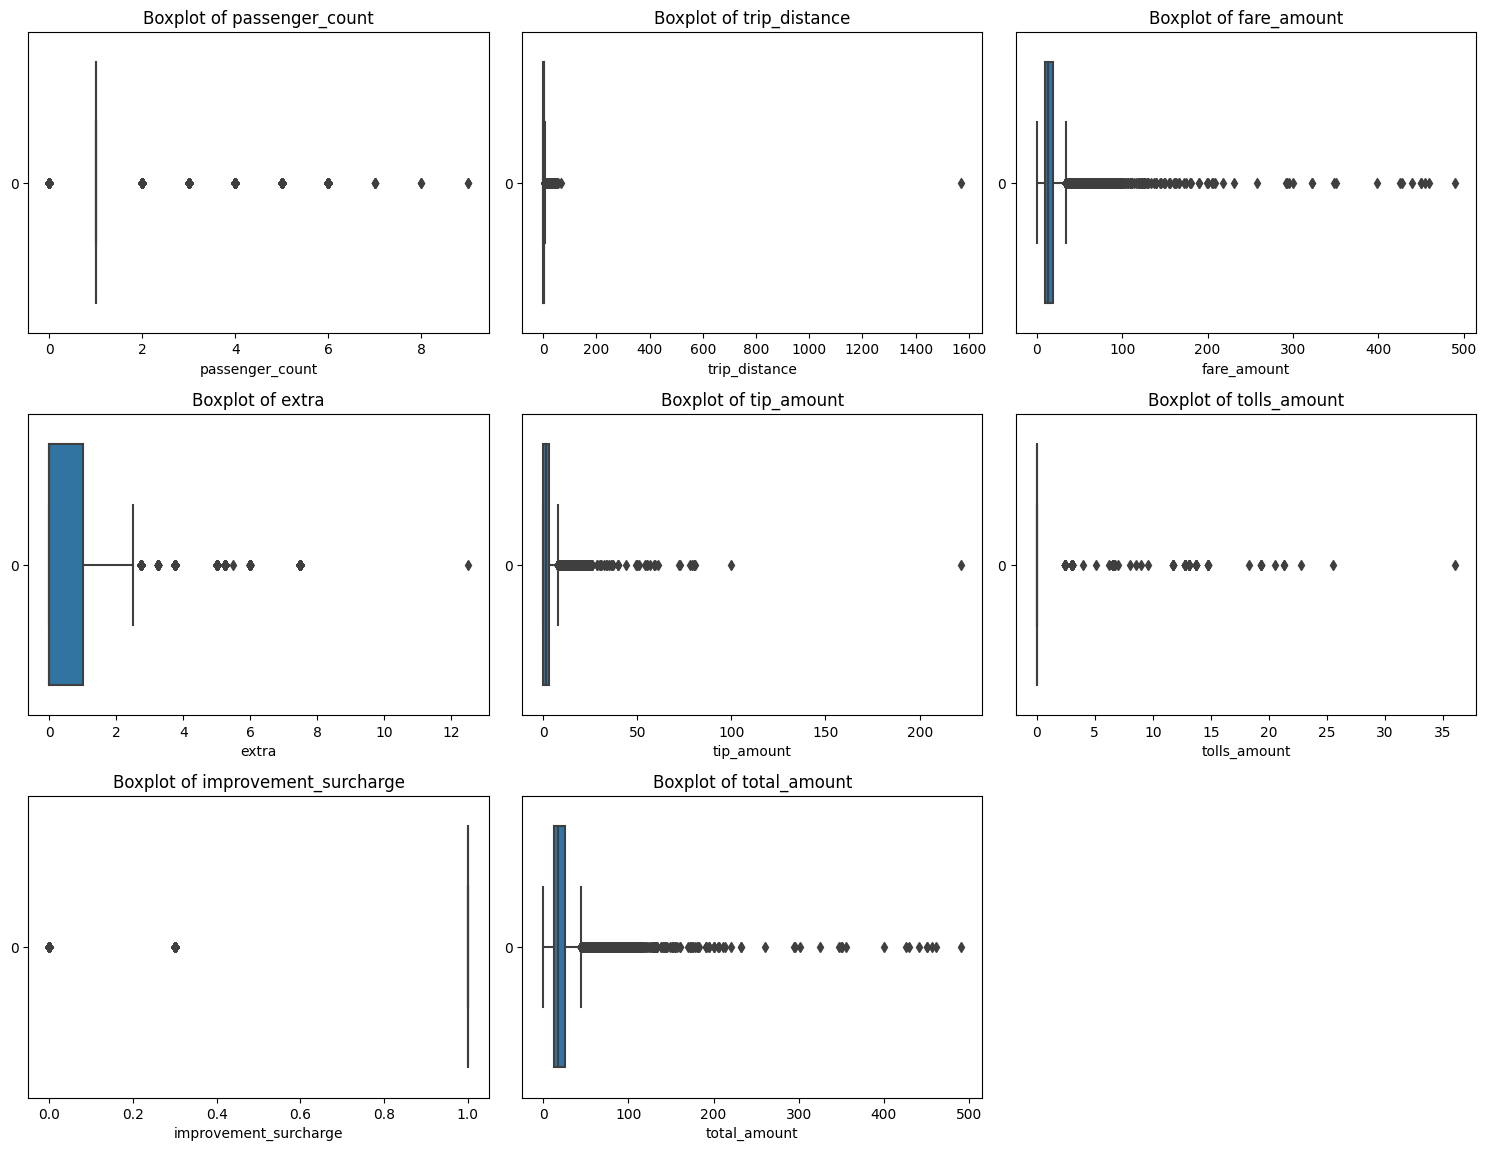

In [351]:
#Plotting boxplot for numerical values 
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df[column], orient='horizontal')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

### 2.4.2 Check on trip_distance

<Axes: >

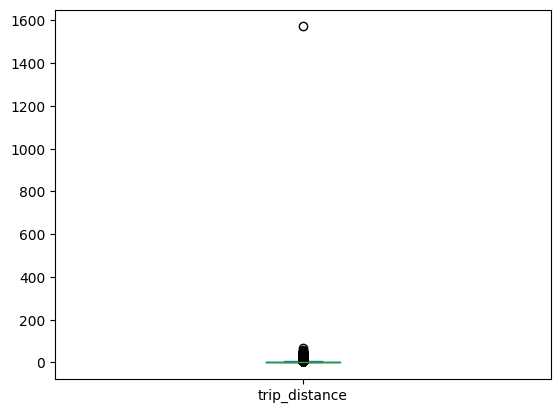

In [352]:
#Check trip_distance distribution by boxplot 
df['trip_distance'].plot(kind='box')

From the boxplot, we can see that there's **1 extreme outlier** which values are way up to about 1600 miles.

In [353]:
#Finding the extreme outlier
df[df['trip_distance'] > 200]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
33373,2,2023-01-17 18:40:38,2023-01-17 19:04:45,N,5.0,82,236,1,1571.97,29.97,0.0,0.0,3.04,6.55,1.0,43.31,1.0,1.0,2.75


Zooming in further we can see the duration between pickup and drop-off are approximately **25 mins** which is **impossible** for a taxi to cover **1571 miles** within that duration. So we would **drop** the data as it is **invalid & unreasonable**.

In [354]:
#Finding the index & dropping the row with outlier
indexTripDistOutlier = df[df['trip_distance'] > 200].index
#df.drop(indexTripDistOutlier, inplace=True)

<Axes: >

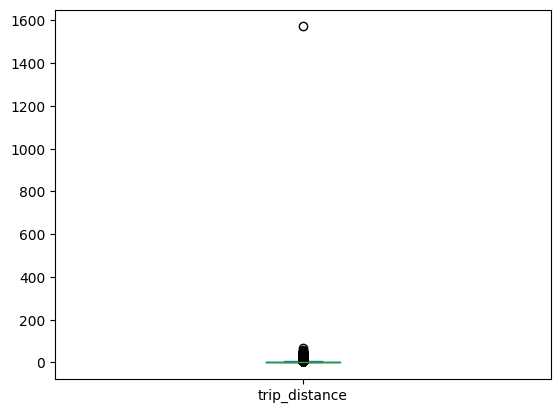

In [355]:
#Check trip_distance distribution by boxplot after removing extreme outlier
df['trip_distance'].plot(kind='box')

## 2.4. Column Cleaning



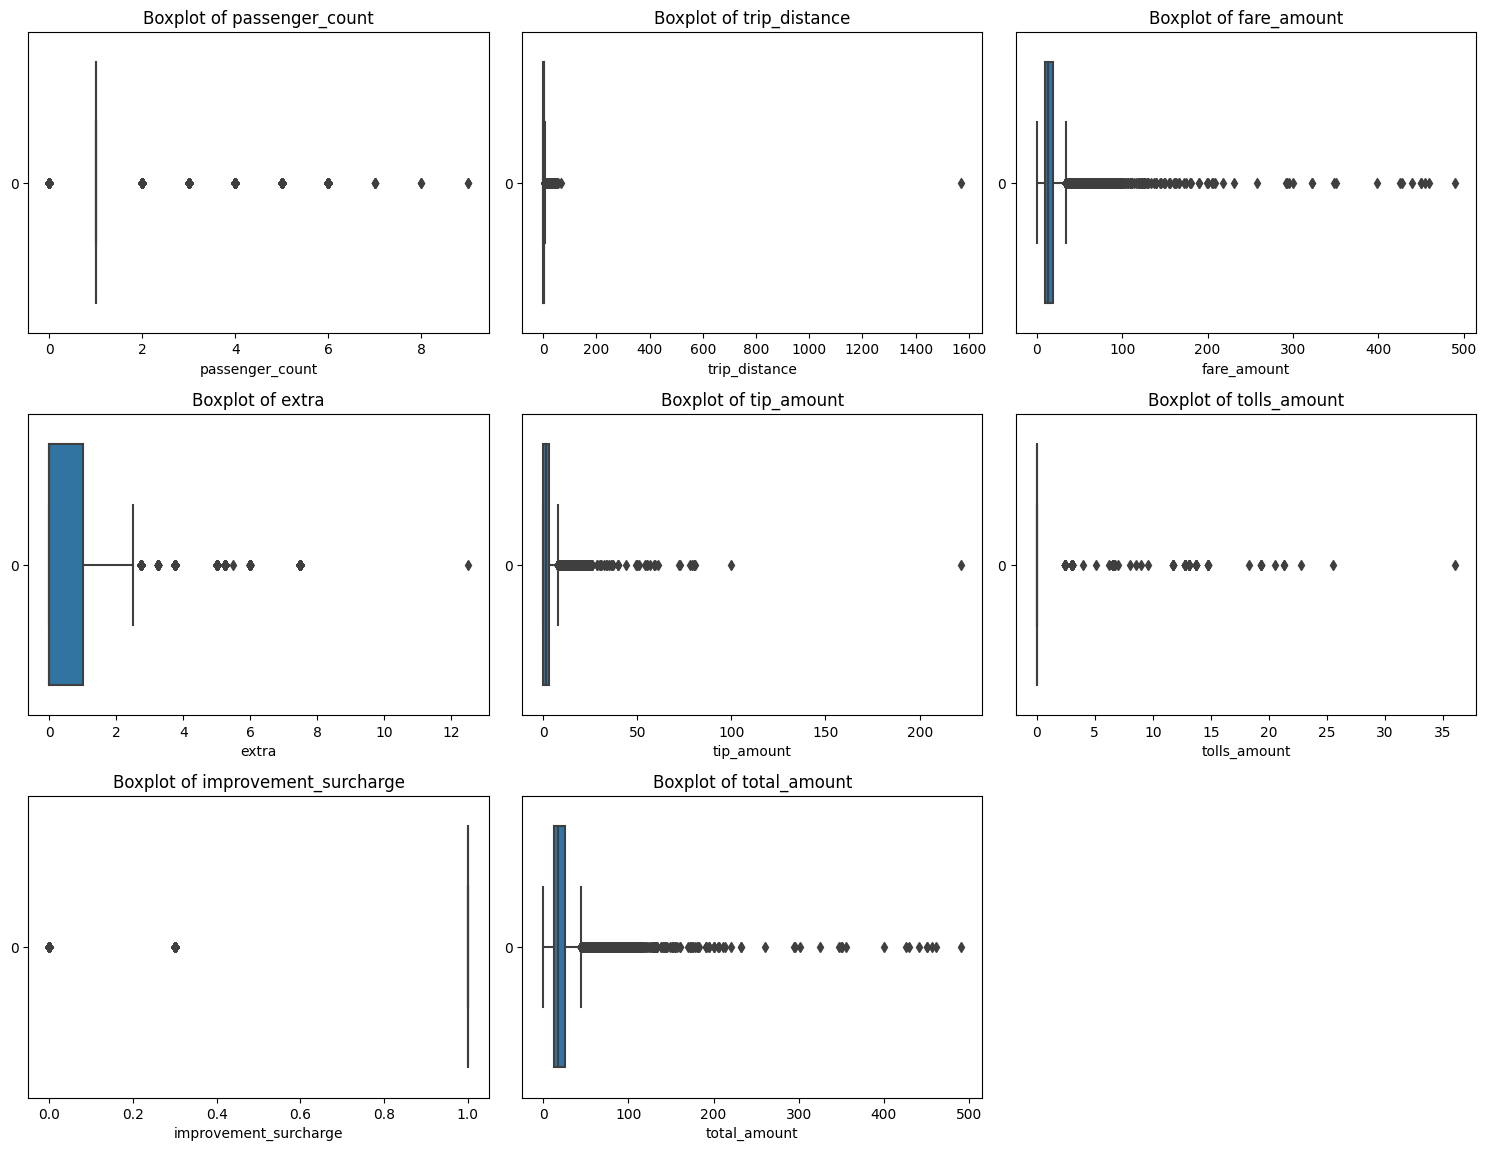

In [356]:
#Plotting boxplot for numerical values 
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df[column], orient='horizontal')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

## 2.5. Reset Indexing


In [357]:
#Resetting index on df
df.reset_index(inplace=True, drop=True)

---

# 3. Feature Engineering: 
Adding additional columns from original data

- Calculate the duration of each trip using the difference between pickup and drop-off time.
- Adding Location column referruing to taxi zone code table
- Identify the month, day of the week, and hour for each trip. Then classify whether the trip is in workday, weekend, or, holiday.
- Calculate the tip percentage using total amount and tip amount.

In [358]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00


## 3.x Merging Zoning Code 


**Adding ADDITIONAL Dataset: Taxi Zone Dataset**

The pick-up and drop-off locations are populated by numbers ranging from 1 to 263. These numbers corresponds to taxi zone.

• Taxi Zone Look Up Table: a table that contains a list of TLC taxi zone location IDs, location names, and corresponding boroughs of each zone.

Obtained from: https://www.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf


In [359]:
#loading taxi zone lookup table

dfZoneTable = pd.read_csv('/Users/Dwika/My Projects/Modul 2 Purwadhika/_CAPSTONE Project Modul 2/Raw Dataset/taxi_zone_lookup.csv')
dfZoneTable

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [360]:
dfZoneTable[dfZoneTable['Borough'] == 'Manhattan']['service_zone'].value_counts()

service_zone
Yellow Zone    55
Boro Zone      14
Name: count, dtype: int64

In [361]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00


In [362]:
#Join 'PickUpLocation' 
df = df.merge(dfZoneTable[['Borough', 'Zone']], left_on=df['PULocationID'], right_on=dfZoneTable['LocationID'], how='inner')


#Renaming PickUp Zone Columns
df.rename(columns={'Borough':'PU_borough', 'Zone':'PU_zone'}, inplace=True)

#Rearange columns so new zone column are next to PULocationID
df = df[['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'PU_borough', 'PU_zone', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge']]

In [363]:
#Join 'DropOffLocation' 
df = df.merge(dfZoneTable[['Borough', 'Zone']], left_on=df['DOLocationID'], right_on=dfZoneTable['LocationID'], how='inner')


#Renaming PickUp Zone Columns
df.rename(columns={'Borough':'DO_borough', 'Zone':'DO_zone'}, inplace=True)

#Rearange columns so new zone column are next to DOLocationID
df = df[['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'PU_borough', 'PU_zone', 'DOLocationID','DO_borough', 'DO_zone',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge']]

In [370]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,PU_borough,PU_zone,DOLocationID,DO_borough,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,Manhattan,Morningside Heights,143,Manhattan,...,14.9,1.00,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-02 18:56:58,2023-01-02 19:14:50,N,1.0,166,Manhattan,Morningside Heights,143,Manhattan,...,19.8,0.00,0.5,0.00,0.0,1.0,24.05,2.0,1.0,2.75
2,2,2023-01-03 15:28:11,2023-01-03 15:47:47,N,1.0,166,Manhattan,Morningside Heights,143,Manhattan,...,19.1,0.00,0.5,4.67,0.0,1.0,28.02,1.0,1.0,2.75
3,2,2023-01-03 17:37:14,2023-01-03 17:51:35,N,1.0,166,Manhattan,Morningside Heights,143,Manhattan,...,15.6,2.50,0.5,0.00,0.0,1.0,22.35,2.0,1.0,2.75
4,1,2023-01-03 19:03:53,2023-01-03 19:17:50,N,1.0,166,Manhattan,Morningside Heights,143,Manhattan,...,13.5,5.25,1.5,0.00,0.0,1.0,20.25,2.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63698,2,2023-01-04 14:06:53,2023-01-04 14:15:41,N,1.0,206,Staten Island,Saint George/New Brighton,206,Staten Island,...,10.7,0.00,0.5,0.00,0.0,1.0,12.20,2.0,1.0,0.00
63699,2,2023-01-11 17:18:54,2023-01-11 17:23:38,N,1.0,206,Staten Island,Saint George/New Brighton,206,Staten Island,...,7.2,2.50,0.5,0.00,0.0,1.0,11.20,1.0,1.0,0.00
63700,2,2023-01-13 18:54:31,2023-01-13 19:14:38,N,1.0,206,Staten Island,Saint George/New Brighton,187,Staten Island,...,25.4,2.50,0.5,0.00,0.0,1.0,29.40,2.0,1.0,0.00
63701,2,2023-01-18 14:37:37,2023-01-18 14:59:56,N,1.0,206,Staten Island,Saint George/New Brighton,156,Staten Island,...,26.1,0.00,0.5,2.00,0.0,1.0,29.60,1.0,1.0,0.00


## 3.1 Adding Duration Column

### 3.1.1 Adding Duration Column

In [ ]:
#Duration obtained by substracting lpep_dropoff_datetime - lpep_pickup_datetime
df['trip_duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
df['trip_duration']

0       0 days 00:11:01
1       0 days 00:06:46
2       0 days 00:06:20
3       0 days 00:05:49
4       0 days 00:05:58
              ...      
63698   0 days 00:07:59
63699   0 days 00:10:45
63700   0 days 00:06:01
63701   0 days 00:09:32
63702   0 days 00:09:56
Name: trip_duration, Length: 63703, dtype: timedelta64[ns]

In [ ]:
df['trip_duration'].describe()

count                        63703
mean     0 days 00:18:00.972952608
std      0 days 01:17:24.155902303
min                0 days 00:00:00
25%                0 days 00:07:06
50%                0 days 00:11:07
75%                0 days 00:16:54
max                0 days 23:59:53
Name: trip_duration, dtype: object

## 3.2 Adding Time of Day Column

# 4. Data Analysis

In [ ]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'trip_duration'],
      dtype='object')

General Insight Questions:
1. How many trips are taken during between a time period?
    - What days are the busiest
    - 
2. How are people using a taxi service? / How the average everyday trip looks like? 
    - What are the average trip 
3. How are the taxi service behaving during external influence?
    - Special Days of year (holidays, national/city wide events)
    - 

In [ ]:
#Available time period from data
df[['lpep_dropoff_datetime', 'lpep_pickup_datetime']].agg(['max', 'min'])

,lpep_dropoff_datetime,lpep_pickup_datetime
max,2023-02-01 17:27:05,2023-02-01 03:10:05
min,2009-01-02 11:07:31,2009-01-01 20:21:27


The Data available are within 1 month period of **January 1st 2023 - February 2nd 2023**

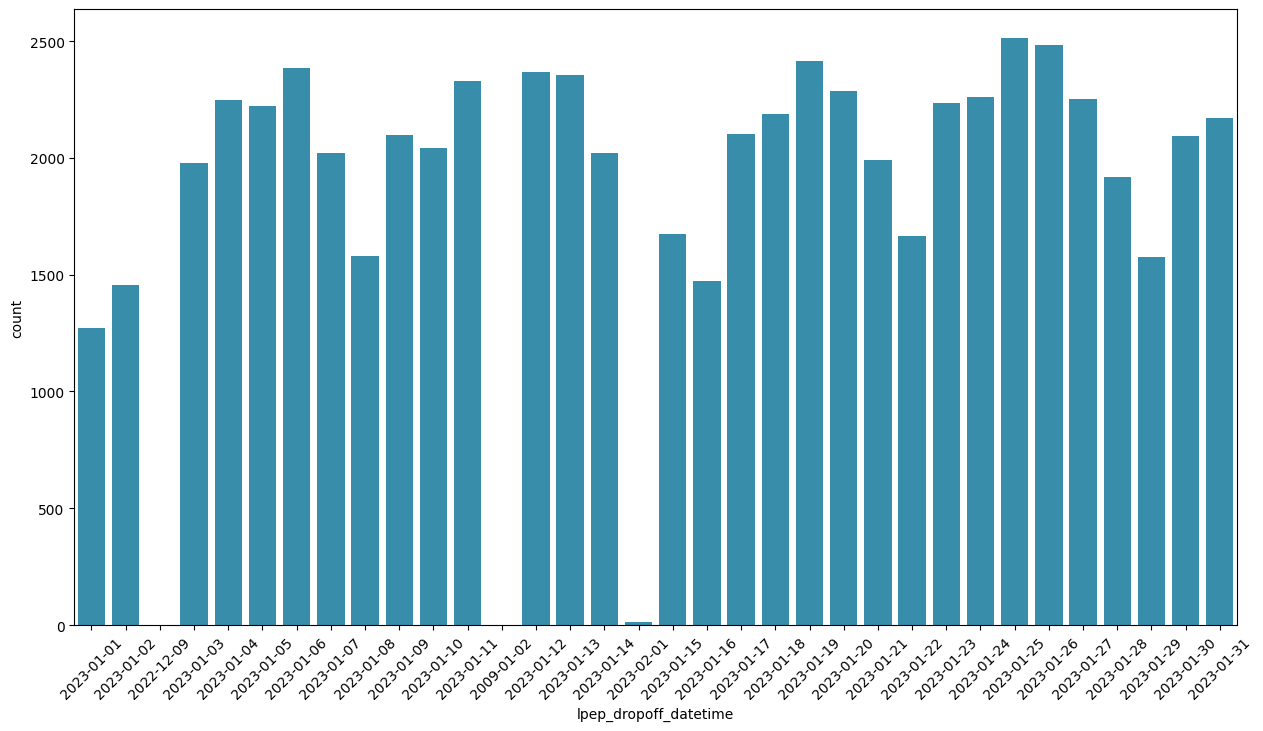

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x=df['lpep_dropoff_datetime'].dt.date,  palette=['#2596be'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Trips taken based on time of day
